<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.988003,98.167780,86.537253,1.697639,238.390675,235.849346,2.541329
1,0.0,1.0,93.158437,90.221338,75.162029,0.606486,269.148290,267.955408,1.192883
2,0.0,2.0,79.759597,99.265737,69.359339,0.077988,258.462663,257.389977,1.072686
3,0.0,3.0,88.265086,73.518982,86.517586,-4.887998,253.413656,258.347956,-4.934300
4,0.0,4.0,70.207577,87.762997,33.074668,-4.163898,196.881344,199.717077,-2.835733
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,26.798318,69.647700,73.905345,-0.217260,180.134103,180.831577,-0.697474
59996,999.0,56.0,20.367319,62.562273,80.409755,1.109250,174.448596,174.413623,0.034973
59997,999.0,57.0,34.233418,34.000613,60.463433,-0.926210,137.771253,139.308067,-1.536813
59998,999.0,58.0,77.628032,99.273055,42.663255,-0.178084,229.386257,227.016653,2.369605


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    41.988003  98.167780  86.537253  ...  238.390675  235.849346   2.541329
      1.0    93.158437  90.221338  75.162029  ...  269.148290  267.955408   1.192883
      2.0    79.759597  99.265737  69.359339  ...  258.462663  257.389977   1.072686
      3.0    88.265086  73.518982  86.517586  ...  253.413656  258.347956  -4.934300
      4.0    70.207577  87.762997  33.074668  ...  196.881344  199.717077  -2.835733
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   26.798318  69.647700  73.905345  ...  180.134103  180.831577  -0.697474
      56.0   20.367319  62.562273  80.409755  ...  174.448596  174.413623   0.034973
      57.0   34.233418  34.000613  60.463433  ...  137.771253  139.308067  -1.536813
      58.0   77.628032  99.273055  42.663255  ...  229.386257  227.016653   2.369605
      59.0   39.806600  52.750258  67.499466  ...  182.509754  170.460556  12.049198

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    41.988003  98.167780  86.537253  ...  238.390675  235.849346   2.541329
      1.0    93.158437  90.221338  75.162029  ...  269.148290  267.955408   1.192883
      2.0    79.759597  99.265737  69.359339  ...  258.462663  257.389977   1.072686
      3.0    88.265086  73.518982  86.517586  ...  253.413656  258.347956  -4.934300
      4.0    70.207577  87.762997  33.074668  ...  196.881344  199.717077  -2.835733
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   26.798318  69.647700  73.905345  ...  180.134103  180.831577  -0.697474
      56.0   20.367319  62.562273  80.409755  ...  174.448596  174.413623   0.034973
      57.0   34.233418  34.000613  60.463433  ...  137.771253  139.308067  -1.536813
      58.0   77.628032  99.273055  42.663255  ...  229.386257  227.016653   2.369605
      59.0   39.806600  52.750258  67.499466  ...  182.509754  170.460556  12.049198

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.988003,98.167780,86.537253,1.697639,238.390675,235.849346,2.541329
1,0.0,1.0,93.158437,90.221338,75.162029,0.606486,269.148290,267.955408,1.192883
2,0.0,2.0,79.759597,99.265737,69.359339,0.077988,258.462663,257.389977,1.072686
3,0.0,3.0,88.265086,73.518982,86.517586,-4.887998,253.413656,258.347956,-4.934300
4,0.0,4.0,70.207577,87.762997,33.074668,-4.163898,196.881344,199.717077,-2.835733
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,26.798318,69.647700,73.905345,-0.217260,180.134103,180.831577,-0.697474
59996,999.0,56.0,20.367319,62.562273,80.409755,1.109250,174.448596,174.413623,0.034973
59997,999.0,57.0,34.233418,34.000613,60.463433,-0.926210,137.771253,139.308067,-1.536813
59998,999.0,58.0,77.628032,99.273055,42.663255,-0.178084,229.386257,227.016653,2.369605


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    41.988003  98.167780  86.537253  ...  238.390675  235.849346   2.541329
      1.0    93.158437  90.221338  75.162029  ...  269.148290  267.955408   1.192883
      2.0    79.759597  99.265737  69.359339  ...  258.462663  257.389977   1.072686
      3.0    88.265086  73.518982  86.517586  ...  253.413656  258.347956  -4.934300
      4.0    70.207577  87.762997  33.074668  ...  196.881344  199.717077  -2.835733
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   26.798318  69.647700  73.905345  ...  180.134103  180.831577  -0.697474
      56.0   20.367319  62.562273  80.409755  ...  174.448596  174.413623   0.034973
      57.0   34.233418  34.000613  60.463433  ...  137.771253  139.308067  -1.536813
      58.0   77.628032  99.273055  42.663255  ...  229.386257  227.016653   2.369605
      59.0   39.806600  52.750258  67.499466  ...  182.509754  170.460556  12.049198

[60000 rows x 7 columns]

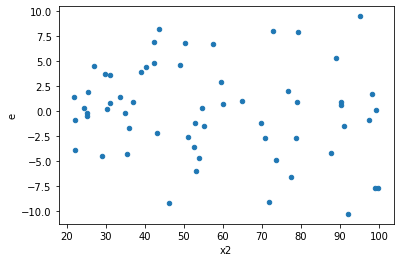

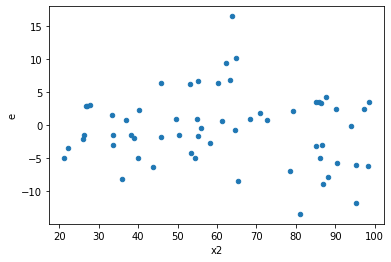

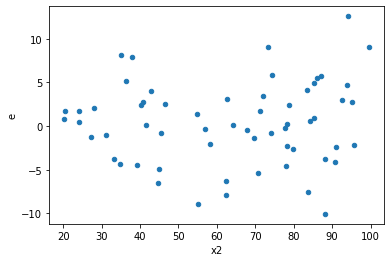

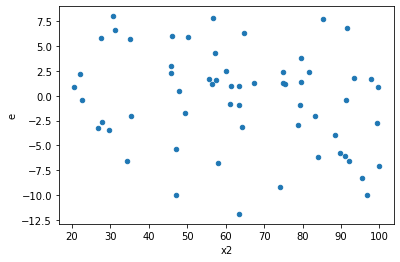

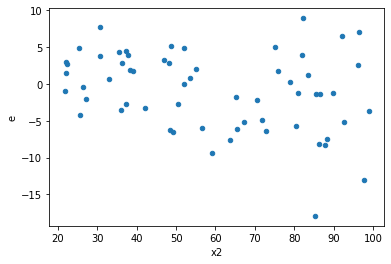

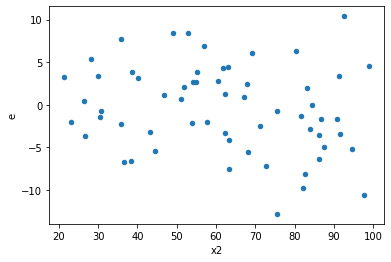

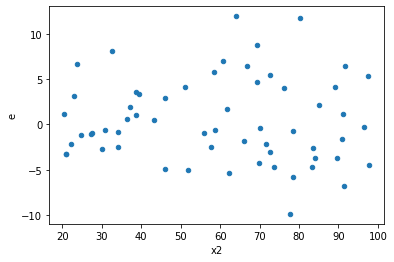

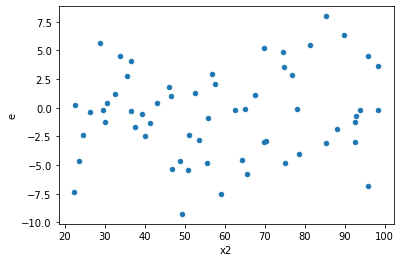

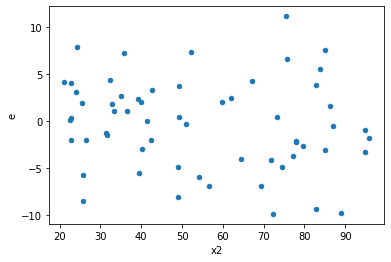

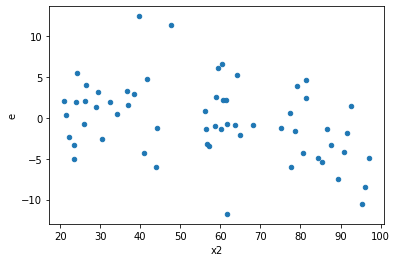

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,28.0,26.0,538.3447660677208,771.2677211281249,19.226598788132886,29.664143120312495,1.542870033706737,0.2698073193938071,0.8650963403030965,0.13490365969690354,Reject001=1 : Homoscedasticity
5.0,31.0,23.0,325.377982530964,770.5018200047377,10.496063952611742,33.50007913064077,3.191680165239935,0.0053456095967892026,0.9973271952016054,0.0026728047983946013,Reject001=0 : Heteroscedasticity
6.0,23.0,31.0,250.54228090647,846.6277456748459,10.893142648107391,27.31057244112406,2.507134380166139,0.017711053209108263,0.9911444733954459,0.008855526604554131,Reject001=1 : Homoscedasticity
9.0,25.0,29.0,275.2828659775894,669.0964132171223,11.011314639103576,23.072290110935253,2.0953256597536978,0.056853582633955124,0.9715732086830224,0.028426791316977562,Reject001=1 : Homoscedasticity
12.0,30.0,24.0,701.456376360492,595.835297634591,23.381879212016397,24.826470734774627,1.0617825243924717,0.8896457240423956,0.5551771379788022,0.4448228620211978,Reject001=1 : Homoscedasticity
14.0,25.0,29.0,212.94503922842318,1465.68835427658,8.517801569136928,50.54097773367517,5.9335706899774925,1.040581852440603e-05,0.9999947970907378,5.202909262203015e-06,Reject001=0 : Heteroscedasticity
15.0,32.0,22.0,450.8654357336923,941.0518250585737,14.089544866677885,42.7750829572079,3.0359449763613022,0.008422941624585789,0.9957885291877071,0.0042114708122928945,Reject001=0 : Heteroscedasticity
16.0,38.0,16.0,694.4197736933129,371.68854341468807,18.274204570876655,23.230533963418004,1.2712199796887567,0.6194721841620696,0.6902639079189652,0.3097360920810348,Reject001=1 : Homoscedasticity
18.0,21.0,33.0,340.67971369951795,1269.3395382019778,16.222843509500855,38.464834490969025,2.371029127442561,0.02557462893090734,0.9872126855345463,0.01278731446545367,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,34.0,628.8913117182948,551.6413294977432,31.444565585914738,16.22474498522774,0.5159793014439177,0.12060525081474407,Reject001=1 : Homoscedasticity
1.0,33.0,21.0,1004.2848259987213,572.5758353094825,30.432873515112767,27.265515967118215,0.895923152099927,0.7594323848379843,Reject001=1 : Homoscedasticity
2.0,32.0,22.0,788.5433266654251,350.4273894542776,24.641978958294533,15.928517702467163,0.6463976667387582,0.25488374422230164,Reject001=1 : Homoscedasticity
3.0,31.0,23.0,885.7140946502047,410.76133251885426,28.571422408071122,17.859188370384967,0.625071727802391,0.22098727471760266,Reject001=1 : Homoscedasticity
4.0,28.0,26.0,538.3447660677208,771.2677211281249,19.226598788132886,29.664143120312495,1.542870033706737,0.2698073193938071,Reject001=1 : Homoscedasticity
5.0,31.0,23.0,325.377982530964,770.5018200047377,10.496063952611742,33.50007913064077,3.191680165239935,0.0053456095967892026,Reject001=0 : Heteroscedasticity
6.0,23.0,31.0,250.54228090647,846.6277456748459,10.893142648107391,27.31057244112406,2.507134380166139,0.017711053209108263,Reject001=1 : Homoscedasticity
7.0,29.0,25.0,509.67038832176576,303.4375894714448,17.574840976612613,12.137503578857793,0.6906181168301634,0.33632487094322033,Reject001=1 : Homoscedasticity
8.0,27.0,27.0,859.3594351052176,414.7100632664888,31.828127226119168,15.359631972832918,0.4825804504208566,0.06351355611159044,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      944
Reject001=0 : Heteroscedasticity     56
Name: Result_test, dtype: int64